# qs 1

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

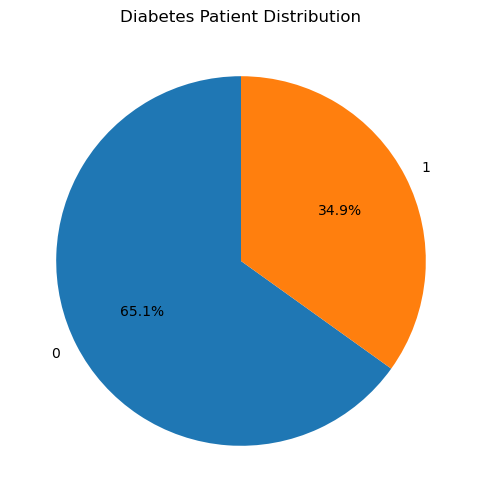

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the 'diabetes.csv' dataset
df = pd.read_csv('diabetes.csv')
print(df)
# Assuming the target column name is 'Outcome' (indicating if a patient has diabetes or not)
target_column = 'Outcome'

# Get the count of each category in the target column
category_counts = df[target_column].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)

# Add a title to the pie chart
plt.title('Diabetes Patient Distribution')

# Display the pie chart
plt.show()


In [12]:
print(df.isnull().sum())
data['Pregnancies'].fillna(data['Pregnancies'].mean(), inplace=True)
data['Glucose'].fillna(data['Glucose'].median(), inplace=True)
data['BloodPressure'].fillna(data['BloodPressure'].mode(), inplace=True)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


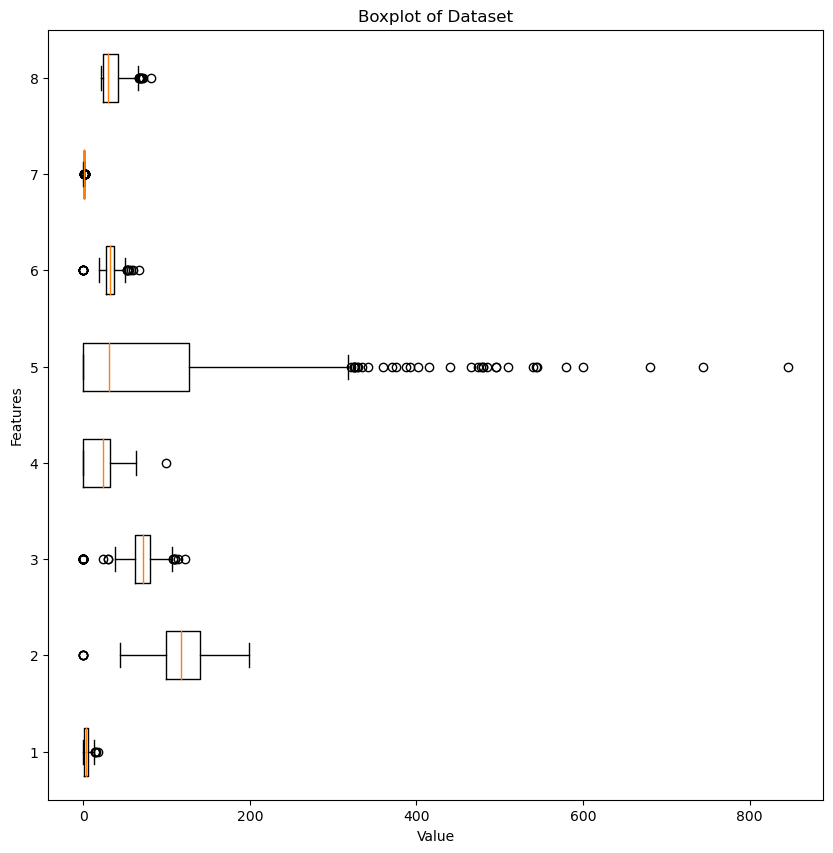

In [22]:
plt.figure(figsize=(10, 10))
plt.boxplot(data.iloc[: , :-1], vert=False)
plt.title('Boxplot of Dataset')
plt.xlabel('Value')
plt.ylabel('Features')
plt.show()

In [24]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

X = data.iloc[:,:-1].values
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=47)

# Support Vector Machine (SVM)
SVC_model = SVC()
SVC_model.fit(X_train, y_train)
SVC_prediction = SVC_model.predict(X_test)
SVC_accuracy=accuracy_score(SVC_prediction, y_test)
SVC_cm=confusion_matrix(SVC_prediction, y_test)
print(SVC_accuracy)
print(classification_report(y_test, y_test))
print(SVC_cm)

# Logistic Regression
logreg_clf = LogisticRegression()
logreg_clf.fit(X_train, y_train)
logreg_prediction = logreg_clf.predict(X_test)
lr_accuracy=accuracy_score(logreg_prediction, y_test)
lr_cm=confusion_matrix(logreg_prediction, y_test)
print(lr_accuracy)
print(classification_report(y_test, y_test))
print(lr_cm)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)
dt_accuracy=accuracy_score(dt_y_pred, y_test)
dt_cm=confusion_matrix(dt_y_pred, y_test)
print(dt_accuracy)
print(classification_report(y_test, y_test))
print(dt_cm)


0.7662337662337663
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00        46

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154

[[99 27]
 [ 9 19]]
0.7532467532467533
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00        46

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154

[[95 25]
 [13 21]]
0.7467532467532467
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00        46

    accuracy                           1.00       154
   macro avg       1.00      1.00

E:\ana\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


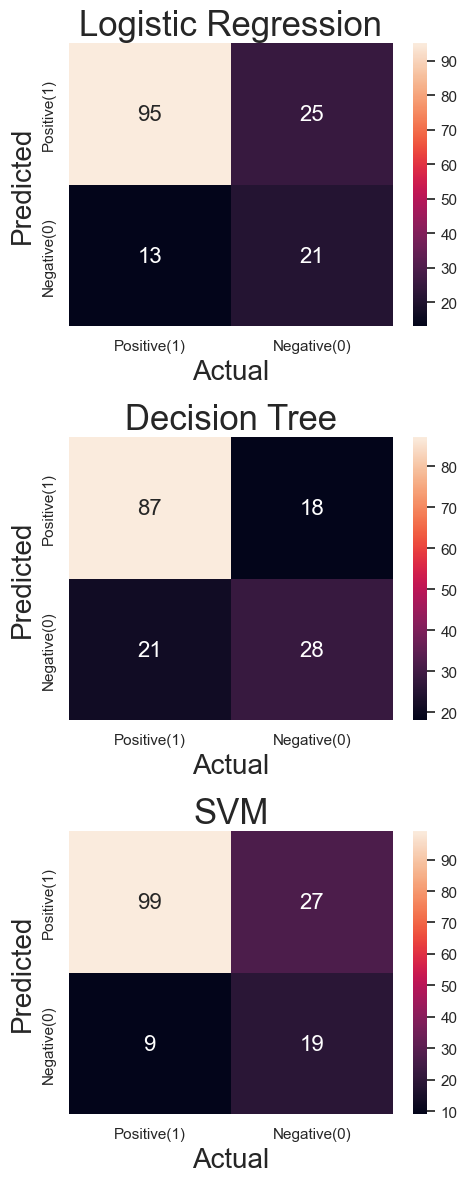

In [38]:
import seaborn as sns 
# Create a list of confusion matrices and corresponding model names
cms = [lr_cm, dt_cm, SVC_cm]
model_names = ['Logistic Regression', 'Decision Tree', 'SVM']
x_axis_labels = ["Positive(1)","Negative(0)"]
y_axis_labels = ["Positive(1)","Negative(0)"]
# Plot the confusion matrices
fig, axes = plt.subplots(3, 1, figsize=(5, 12))
for ax, cm, model_name in zip(axes.flatten(), cms, model_names):
    sns.set(font_scale=1)
    sns.heatmap(cm,xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot=True, fmt='g', ax=ax,annot_kws = {'size': 16})
    ax.set_ylabel('Predicted',fontsize = 20)
    ax.set_xlabel('Actual',fontsize = 20)
    ax.set_title(model_name,fontsize = 25)

plt.tight_layout()
plt.show()

# qs 2

In [39]:
data = pd.read_csv('petrol_consumption.csv')
data.head(5)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

y = data['Petrol_Consumption']
X = data[['Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_tax']]
print(X.shape)

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)

      ## for showing co-relation
feature_names = X.columns
model_coefficients = regressor.coef_
coefficients_df = pd.DataFrame(data = model_coefficients, 
                              index = feature_names, 
                              columns = ['Coefficient value'])
print(coefficients_df)


y_pred = regressor.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

regressor.score(X_test,y_test)

(48, 4)
361.4508790666836
[-5.65355145e-02 -4.38217137e-03  1.34686930e+03 -3.69937459e+01]
                              Coefficient value
Average_income                        -0.056536
Paved_Highways                        -0.004382
Population_Driver_licence(%)        1346.869298
Petrol_tax                           -36.993746
    Actual   Predicted
27     631  606.692665
40     587  673.779442
26     577  584.991490
43     591  563.536910
24     460  519.058672
37     704  643.461003
12     525  572.897614
19     640  687.077036
4      410  547.609366
25     566  530.037630


0.39136640014305346

In [41]:
y = data['Petrol_Consumption']
X = data[['Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_tax']]

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

print(regressor.score(X_test,y_test))

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

print(regressor.score(X_test,y_test))

    Actual   Predicted
27     631  606.692665
40     587  673.779442
26     577  584.991490
43     591  563.536910
24     460  519.058672
37     704  643.461003
12     525  572.897614
19     640  687.077036
4      410  547.609366
25     566  530.037630
0.39136640014305346
    Actual   Predicted
27     631  594.684737
40     587  657.946263
26     577  578.777962
43     591  577.565848
24     460  524.600507
37     704  632.859084
12     525  575.961662
19     640  649.045363
4      410  556.092937
25     566  525.542987
8      464  497.986501
3      414  529.612813
6      344  361.208602
39     968  714.010984
33     628  608.171103
0.6158856157306247


    Actual   Predicted
27     631  606.692665
40     587  673.779442
26     577  584.991490
43     591  563.536910
24     460  519.058672
37     704  643.461003
12     525  572.897614
19     640  687.077036
4      410  547.609366
25     566  530.037630


Text(0.5, 1.0, 'Regression: Actual vs. Predicted Values')

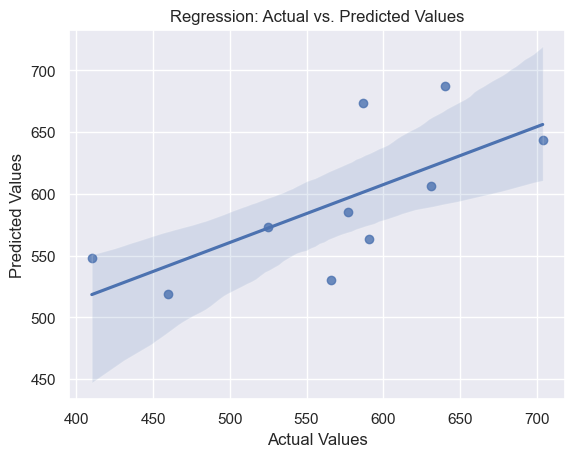

In [43]:
y = data['Petrol_Consumption']
X = data[['Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_tax']]

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

plt.figure() 
sns.regplot(x=y_test, y=y_pred, data=data);
# Add x-label and y-label
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Add a title to the plot
plt.title('Regression: Actual vs. Predicted Values')


In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)

print(f'Mean absolute error: {mae:.2f}')


Mean absolute error: 53.47


# qs 4

In [46]:
data= pd.read_csv('student_marks.csv')
data

,Unnamed: 0,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,John,M,05/04/1988,55,45,56.0,87,21,52,89,65
1,Suresh,M,4/5/1987,75,55,NaN,64,90,61,58,2
2,Ramesh,M,25/5/1989,25,54,89.0,76,95,87,56,74
3,Jessica,F,12/8/1990,78,55,86.0,63,54,89,75,45
4,Jennifer,F,2/9/1989,58,96,78.0,46,96,77,83,53


In [49]:
quartiles = data.quantile([0.25, 0.75])

# Display the first quartile (25th percentile) and third quartile (75th percentile)
print("First Quartile (25th percentile):")
print(quartiles.loc[0.25])

print("\nThird Quartile (75th percentile):")
print(quartiles.loc[0.75])

First Quartile (25th percentile):
Maths        55.0
Physics      54.0
Chemistry    72.5
English      63.0
Biology      54.0
Economics    61.0
History      58.0
Civics       45.0
Name: 0.25, dtype: float64

Third Quartile (75th percentile):
Maths        75.00
Physics      55.00
Chemistry    86.75
English      76.00
Biology      95.00
Economics    87.00
History      83.00
Civics       65.00
Name: 0.75, dtype: float64


In [51]:
std_deviation = data.std()
variance = data.var()

# Display the standard deviation and variance for each subject
print("Standard Deviation:")
print(std_deviation)

print("\nVariance:")
print(variance)

Standard Deviation:
Maths        21.135279
Physics      20.012496
Chemistry    14.908052
English      15.385058
Biology      32.980297
Economics    16.223440
History      14.754660
Civics       27.905197
dtype: float64

Variance:
Maths         446.70
Physics       400.50
Chemistry     222.25
English       236.70
Biology      1087.70
Economics     263.20
History       217.70
Civics        778.70
dtype: float64


C:\Users\Priya Saha\AppData\Local\Temp\ipykernel_17108\2613423819.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std_deviation = data.std()
C:\Users\Priya Saha\AppData\Local\Temp\ipykernel_17108\2613423819.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  variance = data.var()


In [52]:
# Generate a summary of the dataset
summary = data.describe()

# Display the summary
print(summary)

           Maths    Physics  Chemistry    English    Biology  Economics  \
count   5.000000   5.000000   4.000000   5.000000   5.000000    5.00000   
mean   58.200000  61.000000  77.250000  67.200000  71.200000   73.20000   
std    21.135279  20.012496  14.908052  15.385058  32.980297   16.22344   
min    25.000000  45.000000  56.000000  46.000000  21.000000   52.00000   
25%    55.000000  54.000000  72.500000  63.000000  54.000000   61.00000   
50%    58.000000  55.000000  82.000000  64.000000  90.000000   77.00000   
75%    75.000000  55.000000  86.750000  76.000000  95.000000   87.00000   
max    78.000000  96.000000  89.000000  87.000000  96.000000   89.00000   

        History     Civics  
count   5.00000   5.000000  
mean   72.20000  47.800000  
std    14.75466  27.905197  
min    56.00000   2.000000  
25%    58.00000  45.000000  
50%    75.00000  53.000000  
75%    83.00000  65.000000  
max    89.00000  74.000000  


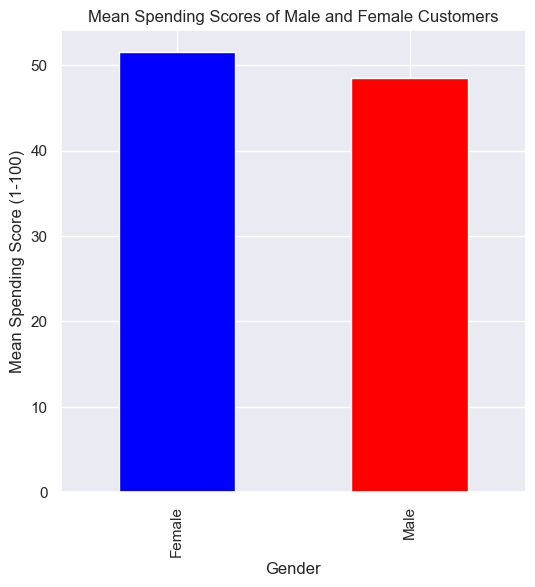

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the 'Mall_customer.csv' dataset
df = pd.read_csv('Mall_Customers.csv')

# Group the data by 'Gender' and calculate the mean spending score for each group
gender_grouped = df.groupby('Genre')['Spending Score (1-100)'].mean()

# Create a bar chart to visualize the mean spending score for male and female customers
plt.figure(figsize=(6, 6))
gender_grouped.plot(kind='bar', color=['blue', 'red'])

# Add labels and title to the plot
plt.xlabel('Gender')
plt.ylabel('Mean Spending Score (1-100)')
plt.title('Mean Spending Scores of Male and Female Customers')

# Display the plot
plt.show()
